In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data2 = pd.read_csv('ex1data2.txt', sep = ',', header = None)

In [3]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data2.columns = ['x0', 'x1', 'y']

In [5]:
data2['y'] = data2['y']/data2.y.max()*10

In [6]:
num_samples = data2.shape[0]
print (num_samples)

47


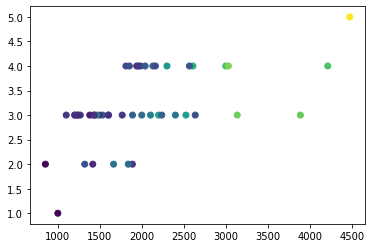

In [7]:
plt.scatter(data2['x0'], data2['x1'], c = data2['y'])

In [8]:
def predict(x, theta):
    ones = [[1] for i in range(len(x))]
    y = np.matmul(np.hstack((x, ones)), np.transpose(theta))
    return y

In [9]:
def sum_squared_error(y, y_pred):
    sse = np.sum([error**2 for error in (y - y_pred)])
    return sse

In [10]:
def normal_equation(x, y):
    ones = [[1] for i in range(len(x))]
    x = np.hstack((x, ones))
    x_array = np.array(x)
    x_transpose = np.transpose(x_array)
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_transpose, x_array)), x_transpose), y)
    return theta

In [11]:
y = data2.pop('y').values
x = data2.values
theta = normal_equation(x, y)

In [12]:
y_pred = predict(x, theta)

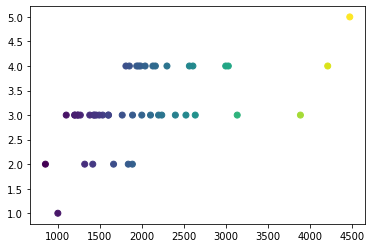

In [13]:
plt.scatter(data2['x0'], data2['x1'], c = y_pred)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
coef = reg.coef_
coef

array([ 0.00198901, -0.12484668])

In [16]:
intercept = reg.intercept_
intercept

1.2801530153278673

In [17]:
y_pred1 = reg.predict(x)

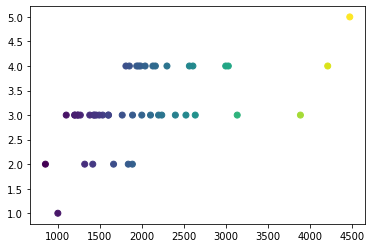

In [18]:
plt.scatter(data2['x0'], data2['x1'], c=y_pred1)

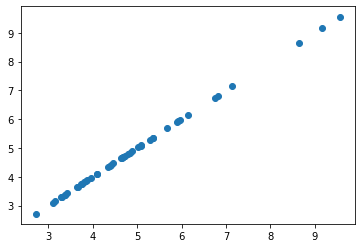

In [19]:
plt.scatter(y_pred, y_pred1)

In [20]:
y_pred-y_pred1

array([-5.32907052e-15, -5.32907052e-15, -5.32907052e-15, -3.10862447e-15,
       -7.10542736e-15, -7.99360578e-15, -5.32907052e-15, -4.88498131e-15,
       -4.88498131e-15, -5.32907052e-15, -7.10542736e-15, -5.32907052e-15,
       -5.32907052e-15, -1.06581410e-14, -4.88498131e-15, -7.10542736e-15,
       -3.10862447e-15, -5.32907052e-15, -7.10542736e-15, -7.99360578e-15,
       -5.32907052e-15, -3.55271368e-15, -5.32907052e-15, -7.10542736e-15,
       -5.32907052e-15, -4.88498131e-15, -4.88498131e-15, -5.32907052e-15,
       -5.32907052e-15, -5.32907052e-15, -2.66453526e-15, -1.33226763e-15,
       -7.10542736e-15, -6.21724894e-15, -7.10542736e-15, -5.32907052e-15,
       -5.32907052e-15, -7.10542736e-15, -1.06581410e-14, -7.99360578e-15,
       -3.55271368e-15, -5.32907052e-15, -7.10542736e-15, -5.32907052e-15,
       -3.55271368e-15, -7.99360578e-15, -5.32907052e-15])